<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Edulearn - Clustering
##IES
---



---

In [531]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 1.Dados IES - INEP

###1.1.Índice Geral dos Cursos (IGC)

 Índice referente à qualidade dos cursos, com resultado do desempenho das instituições de ensino superior do país

In [532]:
#Indicadores de Qualidade da Educação Superior (INEP)
ies_igc = pd.read_excel('IGC_2019.xlsx', usecols=[1, 9, 14])
ies_igc.head()

,Código da IES,Conceito Médio de Graduação,IGC (Contínuo)
0,1,2.924962,3.236518
1,2,3.269586,3.941659
2,3,3.105500,3.367594
3,4,2.821851,3.048187
4,5,2.713283,2.960657


In [533]:
ies_igc.columns

Index([' Código da IES', ' Conceito Médio de Graduação', ' IGC (Contínuo)'], dtype='object')

In [534]:
#Renomeando as colunas
ies_igc = ies_igc.rename(columns={
    ' Código da IES':'cod_ies',
    ' Conceito Médio de Graduação':'conceito_medio_graduacao',
    ' IGC (Contínuo)':'igc_continuo',
    })
ies_igc.head()

,cod_ies,conceito_medio_graduacao,igc_continuo
0,1,2.924962,3.236518
1,2,3.269586,3.941659
2,3,3.105500,3.367594
3,4,2.821851,3.048187
4,5,2.713283,2.960657


### 1.2.Receitas das IES

In [535]:
ies_receitas = pd.read_csv('SUP_IES_2019.CSV', sep='|', encoding='latin1', usecols=['CO_IES','TP_CATEGORIA_ADMINISTRATIVA', 'VL_RECEITA_PROPRIA','VL_RECEITA_TRANSFERENCIA','VL_RECEITA_OUTRA','VL_DESPESA_PESSOAL_DOCENTE','VL_DESPESA_PESSOAL_TECNICO','VL_DESPESA_PESSOAL_ENCARGO','VL_DESPESA_CUSTEIO','VL_DESPESA_INVESTIMENTO','VL_DESPESA_PESQUISA','VL_DESPESA_OUTRA'])
ies_receitas.head(3)

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,VL_RECEITA_PROPRIA,VL_RECEITA_TRANSFERENCIA,VL_RECEITA_OUTRA,VL_DESPESA_PESSOAL_DOCENTE,VL_DESPESA_PESSOAL_TECNICO,VL_DESPESA_PESSOAL_ENCARGO,VL_DESPESA_CUSTEIO,VL_DESPESA_INVESTIMENTO,VL_DESPESA_PESQUISA,VL_DESPESA_OUTRA
0,1,1,8075408.31,9.190156e+08,0.00,2.737906e+08,1.089490e+08,1.050124e+08,1.225790e+08,9606414.13,2512494.15,3.046410e+08
1,2,1,42309485.04,6.376632e+07,53681013.45,8.438613e+08,0.000000e+00,2.873756e+08,2.102659e+08,23154904.42,10350582.30,4.738549e+08
2,3,1,2064512.28,8.836851e+08,59978137.27,2.847694e+08,1.533374e+08,1.080347e+08,1.491604e+08,8212361.64,1445146.30,3.204186e+08


In [536]:
#Renomeando as colunas
ies_receitas = ies_receitas.rename(columns={
    'CO_IES':'cod_ies',
    'TP_CATEGORIA_ADMINISTRATIVA':'categoria_administrativa',
    'VL_RECEITA_PROPRIA':'receita_propria',
    'VL_RECEITA_TRANSFERENCIA':'receita_transferencia',
    'VL_RECEITA_OUTRA':'receita_outra',
    'VL_DESPESA_PESSOAL_DOCENTE':'despesa_pessoal_docente',
    'VL_DESPESA_PESSOAL_TECNICO':'despesa_pessoal_tecnico',
    'VL_DESPESA_PESSOAL_ENCARGO':'despesa_pessoal_encargo',
    'VL_DESPESA_CUSTEIO':'despesa_custeio',
    'VL_DESPESA_INVESTIMENTO':'despesa_investimento',
    'VL_DESPESA_PESQUISA':'despesa_pesquisa',
    'VL_DESPESA_OUTRA':'despesa_outra',
    })
ies_receitas.head()

,cod_ies,categoria_administrativa,receita_propria,receita_transferencia,receita_outra,despesa_pessoal_docente,despesa_pessoal_tecnico,despesa_pessoal_encargo,despesa_custeio,despesa_investimento,despesa_pesquisa,despesa_outra
0,1,1,8075408.31,9.190156e+08,0.00,2.737906e+08,1.089490e+08,1.050124e+08,1.225790e+08,9606414.13,2512494.15,3.046410e+08
1,2,1,42309485.04,6.376632e+07,53681013.45,8.438613e+08,0.000000e+00,2.873756e+08,2.102659e+08,23154904.42,10350582.30,4.738549e+08
2,3,1,2064512.28,8.836851e+08,59978137.27,2.847694e+08,1.533374e+08,1.080347e+08,1.491604e+08,8212361.64,1445146.30,3.204186e+08
3,4,1,5603181.06,1.063315e+09,1721653.86,4.482062e+08,0.000000e+00,1.322010e+08,1.839712e+08,12676251.59,1312837.53,6.845330e+07
4,6,1,5905654.74,4.992185e+08,30461740.62,1.691617e+08,5.899877e+07,4.092087e+07,4.907550e+07,73345.77,828200.00,2.165275e+08


In [537]:
#Inserindo colunas com total de receitas e de despesas
ies_receitas['receitas'] = ies_receitas['receita_propria'] + ies_receitas['receita_transferencia'] + ies_receitas['receita_outra']
ies_receitas['despesas'] = ies_receitas['despesa_pessoal_docente'] + ies_receitas['despesa_pessoal_tecnico'] + ies_receitas['despesa_pessoal_encargo'] + ies_receitas['despesa_custeio'] + ies_receitas['despesa_investimento'] + ies_receitas['despesa_pesquisa'] + ies_receitas['despesa_outra']
ies_receitas.head()

,cod_ies,categoria_administrativa,receita_propria,receita_transferencia,receita_outra,despesa_pessoal_docente,despesa_pessoal_tecnico,despesa_pessoal_encargo,despesa_custeio,despesa_investimento,despesa_pesquisa,despesa_outra,receitas,despesas
0,1,1,8075408.31,9.190156e+08,0.00,2.737906e+08,1.089490e+08,1.050124e+08,1.225790e+08,9606414.13,2512494.15,3.046410e+08,9.270910e+08,9.270910e+08
1,2,1,42309485.04,6.376632e+07,53681013.45,8.438613e+08,0.000000e+00,2.873756e+08,2.102659e+08,23154904.42,10350582.30,4.738549e+08,1.597568e+08,1.848863e+09
2,3,1,2064512.28,8.836851e+08,59978137.27,2.847694e+08,1.533374e+08,1.080347e+08,1.491604e+08,8212361.64,1445146.30,3.204186e+08,9.457277e+08,1.025378e+09
3,4,1,5603181.06,1.063315e+09,1721653.86,4.482062e+08,0.000000e+00,1.322010e+08,1.839712e+08,12676251.59,1312837.53,6.845330e+07,1.070640e+09,8.468208e+08
4,6,1,5905654.74,4.992185e+08,30461740.62,1.691617e+08,5.899877e+07,4.092087e+07,4.907550e+07,73345.77,828200.00,2.165275e+08,5.355859e+08,5.355859e+08


In [538]:
ies_receitas = ies_receitas[['cod_ies','categoria_administrativa','despesa_investimento','receitas']]
ies_receitas.head()

,cod_ies,categoria_administrativa,despesa_investimento,receitas
0,1,1,9606414.13,9.270910e+08
1,2,1,23154904.42,1.597568e+08
2,3,1,8212361.64,9.457277e+08
3,4,1,12676251.59,1.070640e+09
4,6,1,73345.77,5.355859e+08


### 1.3.Recursos

In [539]:
#Contando a quantidade de recursos por curso
ies_recursos = pd.read_csv('SUP_CURSO_2019.CSV', sep='|', encoding='latin1', usecols=['CO_IES', 'CO_CURSO', 'IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA' ])
ies_recursos.head(3)

,CO_IES,CO_CURSO,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [540]:
#Substituindo NaN por zero
ies_recursos.fillna(0, inplace=True)
ies_recursos.head()

,CO_IES,CO_CURSO,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [541]:
#Renomeando as colunas
ies_recursos = ies_recursos.rename(columns={
    'CO_IES':'cod_ies',
    'CO_CURSO':'cod_curso',
    'IN_MATERIAL_DIGITAL':'material_digital',
    'IN_MATERIAL_AMPLIADO':'material_ampliado',
    'IN_MATERIAL_TATIL':'material_tatil',
    'IN_MATERIAL_IMPRESSO':'material_impresso',
    'IN_MATERIAL_AUDIO':'material_audio',
    'IN_MATERIAL_BRAILLE':'material_braille',
    'IN_MATERIAL_LIBRAS':'material_libras',
    'IN_DISCIPLINA_LIBRAS':'disciplina_libras',
    'IN_TRADUTOR_LIBRAS':'tradutor_libras',
    'IN_GUIA_INTERPRETE':'guia_interprete',
    'IN_RECURSOS_COMUNICACAO':'recursos_comunicacao',
    'IN_RECURSOS_INFORMATICA':'recursos_informatica',
})
ies_recursos.head()

,cod_ies,cod_curso,material_digital,material_ampliado,material_tatil,material_impresso,material_audio,material_braille,material_libras,disciplina_libras,tradutor_libras,guia_interprete,recursos_comunicacao,recursos_informatica
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [542]:
ies_recursos['recursos_totais'] = ies_recursos['material_digital'] + ies_recursos['material_ampliado'] + ies_recursos['material_tatil'] + ies_recursos['material_impresso'] + ies_recursos['material_audio'] + ies_recursos['material_braille'] + ies_recursos['material_libras'] + ies_recursos['disciplina_libras'] + ies_recursos['tradutor_libras'] + ies_recursos['guia_interprete'] + ies_recursos['recursos_comunicacao'] + ies_recursos['recursos_informatica']
ies_recursos.head()

,cod_ies,cod_curso,material_digital,material_ampliado,material_tatil,material_impresso,material_audio,material_braille,material_libras,disciplina_libras,tradutor_libras,guia_interprete,recursos_comunicacao,recursos_informatica,recursos_totais
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [543]:
#Contando a quantidade de curso por IES
ies_cursos = ies_recursos.groupby('cod_ies')[['cod_curso']].count()
ies_cursos.head()

,cod_curso
cod_ies,
1,114
2,149
3,116
4,107
5,100


In [544]:
#Transformando num dataframe
ies_cursos = pd.DataFrame(ies_cursos,columns=['cod_curso'])
ies_cursos['cod_ies'] = ies_cursos.index
ies_cursos.index = range(len(ies_cursos))
ies_cursos.head()

,cod_curso,cod_ies
0,114,1
1,149,2
2,116,3
3,107,4
4,100,5


In [545]:
ies_cursos = ies_cursos.rename(columns={
    'cod_curso':'num_curso',
    })
ies_cursos.head(5)

,num_curso,cod_ies
0,114,1
1,149,2
2,116,3
3,107,4
4,100,5


In [546]:
ies_recursos = ies_recursos.drop(columns='cod_curso')
ies_recursos.head(3)

,cod_ies,material_digital,material_ampliado,material_tatil,material_impresso,material_audio,material_braille,material_libras,disciplina_libras,tradutor_libras,guia_interprete,recursos_comunicacao,recursos_informatica,recursos_totais
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [547]:
ies_recursos = ies_recursos.groupby('cod_ies').sum()
ies_recursos.head()

,material_digital,material_ampliado,material_tatil,material_impresso,material_audio,material_braille,material_libras,disciplina_libras,tradutor_libras,guia_interprete,recursos_comunicacao,recursos_informatica,recursos_totais
cod_ies,,,,,,,,,,,,,
1,11.0,13.0,3.0,9.0,5.0,3.0,5.0,66.0,26.0,11.0,7.0,5.0,164.0
2,149.0,148.0,149.0,149.0,148.0,149.0,149.0,149.0,149.0,149.0,148.0,149.0,1785.0
3,20.0,15.0,16.0,21.0,14.0,20.0,23.0,91.0,41.0,31.0,11.0,24.0,327.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,105.0
5,0.0,99.0,100.0,99.0,1.0,100.0,99.0,99.0,100.0,99.0,99.0,99.0,994.0


In [548]:
ies_recursos = pd.merge(ies_recursos, ies_cursos, how='inner', on='cod_ies')
ies_recursos.head()

,cod_ies,material_digital,material_ampliado,material_tatil,material_impresso,material_audio,material_braille,material_libras,disciplina_libras,tradutor_libras,guia_interprete,recursos_comunicacao,recursos_informatica,recursos_totais,num_curso
0,1,11.0,13.0,3.0,9.0,5.0,3.0,5.0,66.0,26.0,11.0,7.0,5.0,164.0,114
1,2,149.0,148.0,149.0,149.0,148.0,149.0,149.0,149.0,149.0,149.0,148.0,149.0,1785.0,149
2,3,20.0,15.0,16.0,21.0,14.0,20.0,23.0,91.0,41.0,31.0,11.0,24.0,327.0,116
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,105.0,107
4,5,0.0,99.0,100.0,99.0,1.0,100.0,99.0,99.0,100.0,99.0,99.0,99.0,994.0,100


In [549]:
ies_recursos['num_recursos_medio'] = ies_recursos['recursos_totais'] / ies_recursos['num_curso']
ies_recursos = ies_recursos.reset_index()
ies_recursos.head()

,index,cod_ies,material_digital,material_ampliado,material_tatil,material_impresso,material_audio,material_braille,material_libras,disciplina_libras,tradutor_libras,guia_interprete,recursos_comunicacao,recursos_informatica,recursos_totais,num_curso,num_recursos_medio
0,0,1,11.0,13.0,3.0,9.0,5.0,3.0,5.0,66.0,26.0,11.0,7.0,5.0,164.0,114,1.438596
1,1,2,149.0,148.0,149.0,149.0,148.0,149.0,149.0,149.0,149.0,149.0,148.0,149.0,1785.0,149,11.979866
2,2,3,20.0,15.0,16.0,21.0,14.0,20.0,23.0,91.0,41.0,31.0,11.0,24.0,327.0,116,2.818966
3,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,105.0,107,0.981308
4,4,5,0.0,99.0,100.0,99.0,1.0,100.0,99.0,99.0,100.0,99.0,99.0,99.0,994.0,100,9.940000


In [550]:
ies_recursos = ies_recursos[['cod_ies','num_recursos_medio','num_curso']]
ies_recursos.head()

,cod_ies,num_recursos_medio,num_curso
0,1,1.438596,114
1,2,11.979866,149
2,3,2.818966,116
3,4,0.981308,107
4,5,9.940000,100


### 1.4.Alunos com deficiência

In [551]:
#Contando a quantidade de alunos com deficiência por IES
ies_alunos = pd.read_csv('alunodeficiente_2019.csv', sep=',', encoding='latin1', usecols=['CO_IES','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO'])
ies_alunos.head(3)

,CO_IES,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [552]:
#Contando a quantidade de curso por IES
ies_alunos = ies_alunos.groupby('CO_IES').sum()
ies_alunos.head()

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
CO_IES,,,,,,,,,,,,,
1,71.0,149.0,10.0,4.0,25.0,0.0,49.0,16.0,0.0,1.0,8.0,0.0,4.0
2,24.0,63.0,8.0,6.0,14.0,2.0,32.0,3.0,3.0,45.0,1.0,0.0,0.0
3,36.0,243.0,17.0,3.0,31.0,0.0,105.0,12.0,1.0,0.0,1.0,0.0,0.0
4,35.0,70.0,64.0,3.0,0.0,0.0,64.0,1.0,2.0,0.0,0.0,0.0,0.0
5,67.0,215.0,7.0,4.0,3.0,0.0,5.0,102.0,5.0,36.0,0.0,0.0,1.0


In [553]:
ies_alunos['ALUNOS_DEFICIENCIA'] = ies_alunos['IN_DEFICIENCIA_AUDITIVA'] + ies_alunos['IN_DEFICIENCIA_FISICA'] + ies_alunos['IN_DEFICIENCIA_INTELECTUAL'] + ies_alunos['IN_DEFICIENCIA_MULTIPLA'] + ies_alunos['IN_DEFICIENCIA_SURDEZ'] + ies_alunos['IN_DEFICIENCIA_SURDOCEGUEIRA'] + ies_alunos['IN_DEFICIENCIA_BAIXA_VISAO'] + ies_alunos['IN_DEFICIENCIA_CEGUEIRA'] + ies_alunos['IN_DEFICIENCIA_SUPERDOTACAO'] + ies_alunos['IN_TGD_AUTISMO'] + ies_alunos['IN_TGD_SINDROME_ASPERGER'] + ies_alunos['IN_TGD_SINDROME_RETT'] + ies_alunos['IN_TGD_TRANSTOR_DESINTEGRATIVO']
ies_alunos = ies_alunos.reset_index()
ies_alunos.head()

,CO_IES,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,ALUNOS_DEFICIENCIA
0,1,71.0,149.0,10.0,4.0,25.0,0.0,49.0,16.0,0.0,1.0,8.0,0.0,4.0,337.0
1,2,24.0,63.0,8.0,6.0,14.0,2.0,32.0,3.0,3.0,45.0,1.0,0.0,0.0,201.0
2,3,36.0,243.0,17.0,3.0,31.0,0.0,105.0,12.0,1.0,0.0,1.0,0.0,0.0,449.0
3,4,35.0,70.0,64.0,3.0,0.0,0.0,64.0,1.0,2.0,0.0,0.0,0.0,0.0,239.0
4,5,67.0,215.0,7.0,4.0,3.0,0.0,5.0,102.0,5.0,36.0,0.0,0.0,1.0,445.0


In [554]:
ies_alunos = ies_alunos[['CO_IES','ALUNOS_DEFICIENCIA']]
ies_alunos.head()

,CO_IES,ALUNOS_DEFICIENCIA
0,1,337.0
1,2,201.0
2,3,449.0
3,4,239.0
4,5,445.0


In [555]:
#Renomeando as colunas
ies_alunos = ies_alunos.rename(columns={
    'CO_IES':'cod_ies',
    'ALUNOS_DEFICIENCIA':'alunos_deficiencia',
    })
ies_alunos.head()

,cod_ies,alunos_deficiencia
0,1,337.0
1,2,201.0
2,3,449.0
3,4,239.0
4,5,445.0


### 1.5.Dados da IES

A fim de fazer uma integração de dados referentes à IES, vamos juntar em um único dataset essas informações para que possam servir de entrada para o clustering.

In [556]:
ies = pd.merge(ies_igc, ies_receitas, how='inner', on='cod_ies')
ies.head()

,cod_ies,conceito_medio_graduacao,igc_continuo,categoria_administrativa,despesa_investimento,receitas
0,1,2.924962,3.236518,1,9606414.13,9.270910e+08
1,2,3.269586,3.941659,1,23154904.42,1.597568e+08
2,3,3.105500,3.367594,1,8212361.64,9.457277e+08
3,4,2.821851,3.048187,1,12676251.59,1.070640e+09
4,5,2.713283,2.960657,1,7835737.00,8.559507e+08


In [557]:
ies = pd.merge(ies, ies_recursos, how='inner', on='cod_ies')
ies.head()

,cod_ies,conceito_medio_graduacao,igc_continuo,categoria_administrativa,despesa_investimento,receitas,num_recursos_medio,num_curso
0,1,2.924962,3.236518,1,9606414.13,9.270910e+08,1.438596,114
1,2,3.269586,3.941659,1,23154904.42,1.597568e+08,11.979866,149
2,3,3.105500,3.367594,1,8212361.64,9.457277e+08,2.818966,116
3,4,2.821851,3.048187,1,12676251.59,1.070640e+09,0.981308,107
4,5,2.713283,2.960657,1,7835737.00,8.559507e+08,9.940000,100


In [558]:
ies = pd.merge(ies, ies_alunos, how='inner', on='cod_ies')
ies.head()

,cod_ies,conceito_medio_graduacao,igc_continuo,categoria_administrativa,despesa_investimento,receitas,num_recursos_medio,num_curso,alunos_deficiencia
0,1,2.924962,3.236518,1,9606414.13,9.270910e+08,1.438596,114,337.0
1,2,3.269586,3.941659,1,23154904.42,1.597568e+08,11.979866,149,201.0
2,3,3.105500,3.367594,1,8212361.64,9.457277e+08,2.818966,116,449.0
3,4,2.821851,3.048187,1,12676251.59,1.070640e+09,0.981308,107,239.0
4,5,2.713283,2.960657,1,7835737.00,8.559507e+08,9.940000,100,445.0


In [559]:
ies = ies[['categoria_administrativa','alunos_deficiencia','num_recursos_medio','num_curso','receitas','despesa_investimento','conceito_medio_graduacao','igc_continuo']]
ies.head()

,categoria_administrativa,alunos_deficiencia,num_recursos_medio,num_curso,receitas,despesa_investimento,conceito_medio_graduacao,igc_continuo
0,1,337.0,1.438596,114,9.270910e+08,9606414.13,2.924962,3.236518
1,1,201.0,11.979866,149,1.597568e+08,23154904.42,3.269586,3.941659
2,1,449.0,2.818966,116,9.457277e+08,8212361.64,3.105500,3.367594
3,1,239.0,0.981308,107,1.070640e+09,12676251.59,2.821851,3.048187
4,1,445.0,9.940000,100,8.559507e+08,7835737.00,2.713283,2.960657


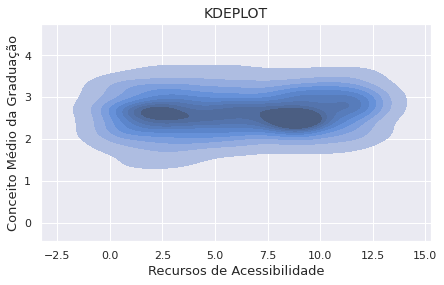

In [560]:
plt.figure(1 , figsize = (7,4))
sns.kdeplot(x = 'num_recursos_medio', y = 'conceito_medio_graduacao', data = ies, fill=True, palette='crest')
plt.title("KDEPLOT", fontsize=14)
plt.ylabel('Conceito Médio da Graduação', fontsize=13), plt.xlabel('Recursos de Acessibilidade', fontsize=13)
plt.savefig('kdeplot.png', transparent = True)

In [561]:
ies.describe()

,categoria_administrativa,alunos_deficiencia,num_recursos_medio,num_curso,receitas,despesa_investimento,conceito_medio_graduacao,igc_continuo
count,1443.000000,1443.000000,1443.000000,1443.000000,1.443000e+03,1.443000e+03,1443.000000,1441.000000
mean,4.012474,47.995149,6.089783,24.426888,2.947747e+08,1.648067e+07,2.627170,2.672296
std,1.166980,176.824558,3.689614,42.325656,5.993693e+08,5.308947e+07,0.501229,0.544439
min,1.000000,1.000000,0.000000,1.000000,1.000000e-02,0.000000e+00,0.000000,0.797657
25%,4.000000,2.000000,3.000000,5.000000,7.128023e+06,0.000000e+00,2.305112,2.307758
50%,4.000000,5.000000,6.000000,12.000000,3.373089e+07,5.877124e+05,2.618685,2.641441
75%,5.000000,24.000000,9.000000,25.000000,2.607849e+08,7.146007e+06,2.952388,2.996998
max,7.000000,3333.000000,12.000000,928.000000,4.167839e+09,5.355536e+08,4.302528,4.854888


## 2.Pré-processamento dos dados

Depois de remover as duplicatas, colunas desnecessárias e analisar os dados inconsistentes, precisamos ainda fazer o tratamento dos dados ausentes e de outliers e ruído, ratamento de dados ausentes.

Além disso, precisamos transformar os dados em relação a sua escala e remover as variáveis ​​dependentes (altamente correlacionadas), por meio da normalização e analisando sua correlação, respectivamente.

###2.1.Outliers

####2.1.1.Alunos

Text(0, 0.5, 'Alunos')

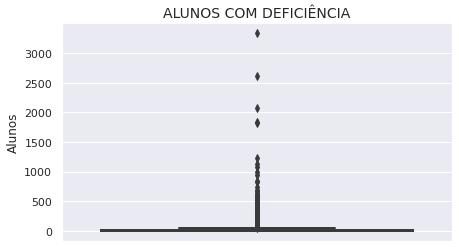

In [562]:
#Boxplot para visualização de outliers
plt.figure(figsize =(7, 4))
grafico_1 = sns.boxplot( y = "alunos_deficiencia", data = ies, linewidth=2, palette = "crest")
plt.title("ALUNOS COM DEFICIÊNCIA", loc="center", fontsize=14)
plt.ylabel('Alunos')

In [563]:
#Tratando outliers no campo de alunos
alunos_novo = ies['alunos_deficiencia']
Q1 = alunos_novo.quantile(.25)
Q3 = alunos_novo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao_alunos = (alunos_novo >= limite_inferior) & (alunos_novo <= limite_superior)
novo_ies = ies[selecao_alunos]

Text(0, 0.5, 'Alunos')

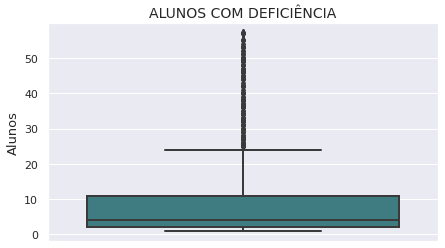

In [564]:
#Boxplot para visualização pós tratamento de outliers
plt.figure(figsize =(7, 4))
grafico_1 = sns.boxplot( y = "alunos_deficiencia", data = novo_ies, linewidth=2, palette = "crest")
plt.title("ALUNOS COM DEFICIÊNCIA", fontsize=14)
plt.ylabel('Alunos', fontsize=13)

####2.1.2.Recursos

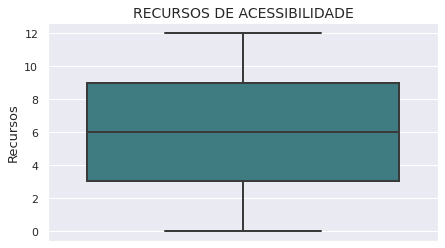

In [565]:
#Boxplot para visualização de outliers
plt.figure(figsize =(7, 4))
grafico_2 = sns.boxplot( y = 'num_recursos_medio', data = ies, linewidth=2, palette = "crest")
plt.title("RECURSOS DE ACESSIBILIDADE", fontsize=14)
plt.ylabel('Recursos', fontsize=13)
plt.savefig('outliers_recursos.png', transparent = True)

Neste caso, não houve tratamento de outliers, pois não conseguimos visualizá-los pelo boxplot

####2.1.3.Número de cursos

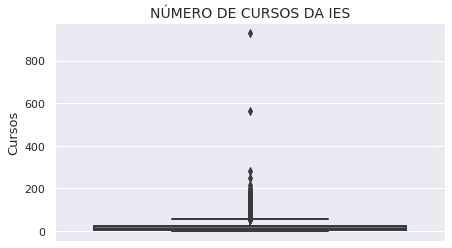

In [566]:
#Boxplot para visualização de outliers
plt.figure(figsize =(7, 4))
grafico_3 = sns.boxplot( y = "num_curso", data = ies, linewidth=2, palette = "crest")
plt.title("NÚMERO DE CURSOS DA IES", fontsize=14)
plt.ylabel('Cursos', fontsize=13)
plt.savefig('outliers_cursos.png', transparent = True)

In [567]:
#Tratando outliers no campo de receitas
num_curso_novo = ies['num_curso']
Q1 = num_curso_novo.quantile(.25)
Q3 = num_curso_novo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao_num_curso = (num_curso_novo >= limite_inferior) & (num_curso_novo <= limite_superior)
novo_ies = ies[selecao_num_curso]

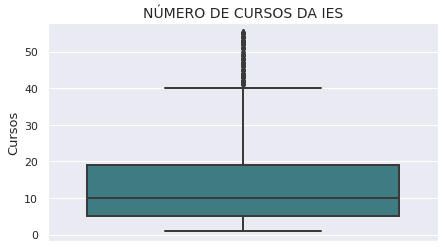

In [568]:
#Boxplot para visualização após tratamento de outliers
plt.figure(figsize =(7, 4))
grafico_3 = sns.boxplot( y = "num_curso", data = novo_ies, linewidth=2, palette = "crest")
plt.title("NÚMERO DE CURSOS DA IES", fontsize=14)
plt.ylabel('Cursos', fontsize=13)
plt.savefig('posoutliers_cursos.png', transparent = True)

####2.2.4.Receitas

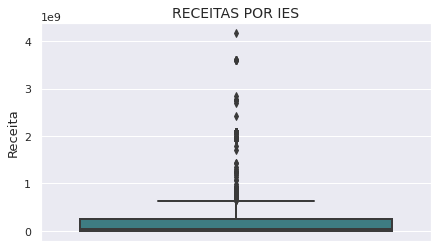

In [569]:
#Boxplot para visualização de outliers
plt.figure(figsize =(7, 4))
grafico_4 = sns.boxplot( y = "receitas", data = ies, linewidth=2, palette = "crest")
plt.title("RECEITAS POR IES", fontsize=14)
plt.ylabel('Receita', fontsize=13)
plt.savefig('outliers_receitas.png', transparent = True)

In [570]:
#Tratando outliers no campo de receitas
receitas_novo = ies['receitas']
Q1 = receitas_novo.quantile(.25)
Q3 = receitas_novo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao_receitas = (receitas_novo >= limite_inferior) & (receitas_novo <= limite_superior)
novo_ies = ies[selecao_receitas]
novo_ies.describe()

,categoria_administrativa,alunos_deficiencia,num_recursos_medio,num_curso,receitas,despesa_investimento,conceito_medio_graduacao,igc_continuo
count,1263.000000,1263.000000,1263.000000,1263.000000,1.263000e+03,1.263000e+03,1263.000000,1261.000000
mean,4.114806,30.842439,5.839997,20.121932,1.038622e+08,3.754587e+06,2.626950,2.660775
std,1.106941,132.258864,3.708410,26.641799,1.623415e+08,8.267849e+06,0.511315,0.532696
min,1.000000,1.000000,0.000000,1.000000,1.000000e-02,0.000000e+00,0.000000,0.797657
25%,4.000000,2.000000,2.741667,5.000000,5.765061e+06,0.000000e+00,2.301350,2.306535
50%,4.000000,4.000000,5.680000,11.000000,2.375738e+07,3.396300e+05,2.627094,2.644210
75%,5.000000,15.000000,9.000000,23.000000,1.255908e+08,3.614441e+06,2.949499,2.979479
max,7.000000,3333.000000,12.000000,247.000000,6.364278e+08,1.014132e+08,4.302528,4.854888


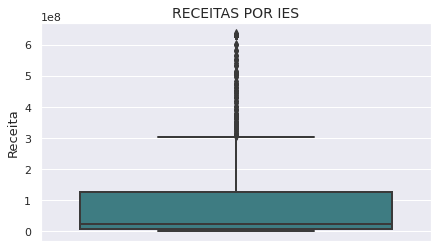

In [571]:
#Boxplot para visualização após tratamento de outliers
plt.figure(figsize =(7, 4))
grafico_4 = sns.boxplot( y = "receitas", data = novo_ies, linewidth=2, palette = "crest")
plt.title("RECEITAS POR IES", fontsize=14)
plt.ylabel('Receita', fontsize=13)
plt.savefig('posoutliers_receitas.png', transparent = True)

####2.2.5.Despesas

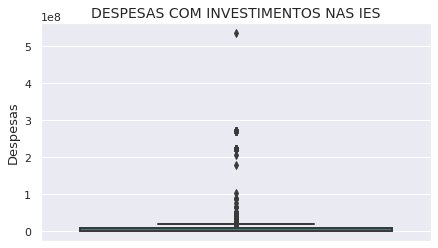

In [572]:
#Boxplot para visualização de outliers
plt.figure(figsize =(7, 4))
grafico_5 = sns.boxplot( y = "despesa_investimento", data = ies, linewidth=2, palette = "crest")
plt.title("DESPESAS COM INVESTIMENTOS NAS IES", fontsize=14)
plt.ylabel('Despesas', fontsize=13)
plt.savefig('outliers_despesa.png', transparent = True)

In [573]:
#Tratando outliers no campo de despesas
despesas_novo = ies['despesa_investimento']
Q1 = despesas_novo.quantile(.25)
Q3 = despesas_novo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao_despesas = (despesas_novo >= limite_inferior) & (despesas_novo <= limite_superior)
novo_ies = ies[selecao_despesas]
novo_ies.describe()

,categoria_administrativa,alunos_deficiencia,num_recursos_medio,num_curso,receitas,despesa_investimento,conceito_medio_graduacao,igc_continuo
count,1275.000000,1275.000000,1275.000000,1275.000000,1.275000e+03,1.275000e+03,1275.000000,1273.000000
mean,4.073725,34.773333,5.820147,21.185098,1.615695e+08,2.776915e+06,2.620820,2.658819
std,1.135647,141.494095,3.696874,31.859734,3.853994e+08,4.810924e+06,0.506960,0.536298
min,1.000000,1.000000,0.000000,1.000000,1.000000e-02,0.000000e+00,0.000000,0.797657
25%,4.000000,2.000000,2.750000,5.000000,5.825178e+06,0.000000e+00,2.298781,2.305707
50%,4.000000,4.000000,5.625000,11.000000,2.480943e+07,3.040221e+05,2.619804,2.640851
75%,5.000000,15.000000,9.000000,23.000000,1.492101e+08,3.158863e+06,2.939377,2.973196
max,7.000000,3333.000000,12.000000,563.000000,3.610593e+09,1.782462e+07,4.302528,4.854888


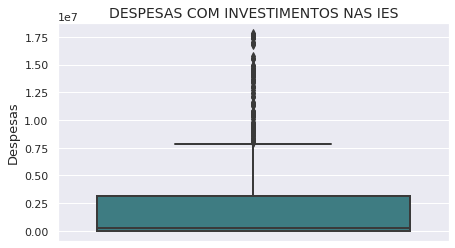

In [574]:
#Boxplot para visualização após tratamento de outliers
plt.figure(figsize =(7, 4))
grafico_5 = sns.boxplot( y = "despesa_investimento", data = novo_ies, linewidth=2, palette = "crest")
plt.title("DESPESAS COM INVESTIMENTOS NAS IES", fontsize=14)
plt.ylabel('Despesas', fontsize=13)
plt.savefig('posoutliers_despesa.png', transparent = True)

####2.2.6.IGC

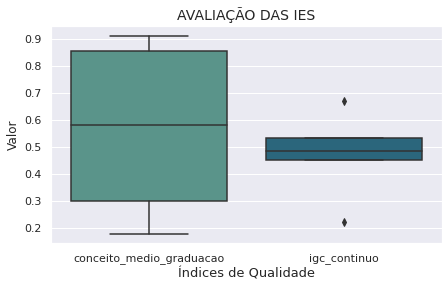

In [575]:
#Visualizando os outliers dos índices de qualidade das IES
plt.figure(figsize =(7, 4))
avaliacao = pd.DataFrame(data = np.random.random(size=(5,2)), columns = ['conceito_medio_graduacao','igc_continuo'])
sns.boxplot(x="variable", y="value", data=pd.melt(qualidade), palette="crest").figure.savefig('outliers_qualidade')
plt.title("AVALIAÇÃO DAS IES", loc="center", fontsize=14)
plt.xlabel('Índices de Qualidade', fontsize=13)
plt.ylabel('Valor')
plt.savefig('outliers_avaliacao.png', transparent = True)

Como o boxplot não mostra a existência de outliers, não será necessário fazer nenhum tratamento referente ao assunto.

###2.2.Normalização

In [576]:
#Colunas para normalizar
features_to_normalize = ['alunos_deficiencia','num_recursos_medio', 'num_curso', 'receitas','despesa_investimento', 'conceito_medio_graduacao', 'igc_continuo']

novo_ies[features_to_normalize] = novo_ies[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [578]:
#Dataframe normalizado
df_ies = novo_ies[['alunos_deficiencia','num_recursos_medio', 'num_curso', 'receitas','despesa_investimento', 'conceito_medio_graduacao','igc_continuo']]
df_ies.head()

,alunos_deficiencia,num_recursos_medio,num_curso,receitas,despesa_investimento,conceito_medio_graduacao,igc_continuo
0,0.100840,0.119883,0.201068,0.256770,0.538941,0.679824,0.601115
2,0.134454,0.234914,0.204626,0.261931,0.460731,0.721785,0.633421
3,0.071429,0.081776,0.188612,0.296527,0.711165,0.655859,0.554696
4,0.133253,0.828333,0.176157,0.237067,0.439602,0.630625,0.533122
5,0.039916,0.919697,0.096085,0.148337,0.004115,0.749051,0.668392


###2.3.Matriz de Correlação

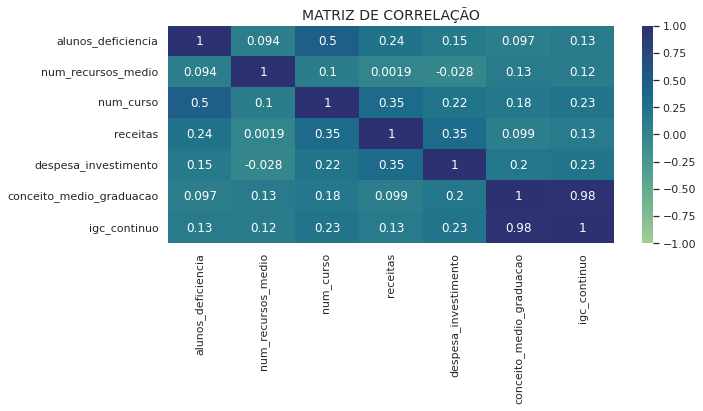

In [579]:
plt.figure(figsize =(10, 4))
sns.heatmap(df_ies.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'crest')
plt.title("MATRIZ DE CORRELAÇÃO", fontsize=14)
plt.savefig('matriz_correlacao.png', transparent = True)

Como as variáveis "conceito médio da graduação" e "igc contínuo" possuem uma forte correlaçao, vamos retirar uma delas para usarmos no nosso modelo

In [580]:
#Dataframe finalizado
df_ies = df_ies[['alunos_deficiencia','num_recursos_medio', 'num_curso', 'receitas','despesa_investimento', 'conceito_medio_graduacao']]
df_ies.head()

,alunos_deficiencia,num_recursos_medio,num_curso,receitas,despesa_investimento,conceito_medio_graduacao
0,0.100840,0.119883,0.201068,0.256770,0.538941,0.679824
2,0.134454,0.234914,0.204626,0.261931,0.460731,0.721785
3,0.071429,0.081776,0.188612,0.296527,0.711165,0.655859
4,0.133253,0.828333,0.176157,0.237067,0.439602,0.630625
5,0.039916,0.919697,0.096085,0.148337,0.004115,0.749051


##3.Clustering

###3.1.Método da Silhueta
#####Código de: MIT © Etzion Harari

In [581]:
faixa_n_clusters = [i for i in range(2,10)]
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k, random_state=10) #random state para inicializar sempre no mesmo local
    labels = agrupador.fit_predict(df_ies)
    media_silhueta = silhouette_score(df_ies, labels)
    valores_silhueta.append(media_silhueta)

In [582]:
valores_silhueta

[0.3714146545761341,
 0.4364874639334774,
 0.34129036424558634,
 0.35247138282643775,
 0.3606007128780921,
 0.3659461227184312,
 0.30682156275283595,
 0.308924984138032]

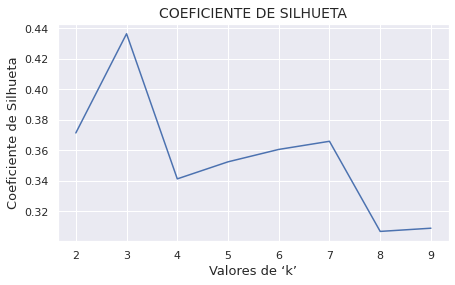

In [585]:
plt.figure(figsize =(7, 4))
sns.lineplot(x=faixa_n_clusters, y=valores_silhueta, palette='crest')
plt.title("COEFICIENTE DE SILHUETA", fontsize=14)
plt.xlabel('Valores de ‘k’', fontsize=13)
plt.ylabel('Coeficiente de Silhueta', fontsize=13)
plt.savefig('coeficiente_silhueta.png', transparent = True)

###3.2.K-Means

In [587]:
#Dados para o clustering
df_ies.head()

,alunos_deficiencia,num_recursos_medio,num_curso,receitas,despesa_investimento,conceito_medio_graduacao
0,0.100840,0.119883,0.201068,0.256770,0.538941,0.679824
2,0.134454,0.234914,0.204626,0.261931,0.460731,0.721785
3,0.071429,0.081776,0.188612,0.296527,0.711165,0.655859
4,0.133253,0.828333,0.176157,0.237067,0.439602,0.630625
5,0.039916,0.919697,0.096085,0.148337,0.004115,0.749051


Vamos adotar o número de 3 clusters, pois foi o teve o melhor escore no método da silhueta

###3.2.1 Recursos de Acessibilidade x Conceito Médio da Graduação

In [663]:
#Inicializando e Computando o KMeans com o valor de 3 clusters:
X1 = df_ies[['num_recursos_medio', 'conceito_medio_graduacao']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X1)

KMeans(n_clusters=3)

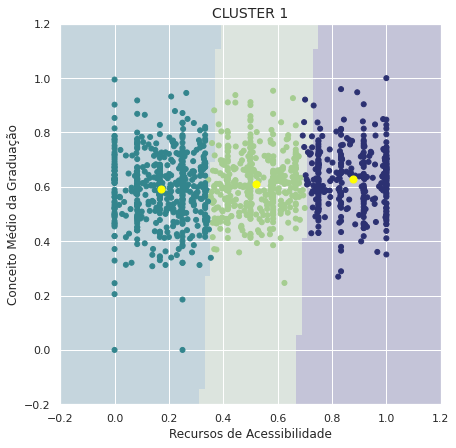

In [664]:
#Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (7,7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
cmap = sns.color_palette("crest", as_cmap=True)
plt.imshow(Z2, extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = cmap, alpha=0.2)
plt.scatter(x = 'num_recursos_medio', y = 'conceito_medio_graduacao', data = df_ies , c = labels2 , s = 25, cmap='crest')
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 50 , c = 'yellow' , alpha = 1)
plt.xlim(-0.2,1.2), plt.ylim(-0.2,1.2)
plt.title("CLUSTER 1", fontsize=14)
plt.ylabel('Conceito Médio da Graduação') , plt.xlabel('Recursos de Acessibilidade')
plt.savefig('k-means1.png', transparent = True)

###3.2.2 Alunos com Deficiência x Conceito Médio da Graduação

In [640]:
#Inicializando e Computando o KMeans com o valor de 3 clusters:
X2 = df_ies[['conceito_medio_graduacao', 'alunos_deficiencia']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

KMeans(n_clusters=3)

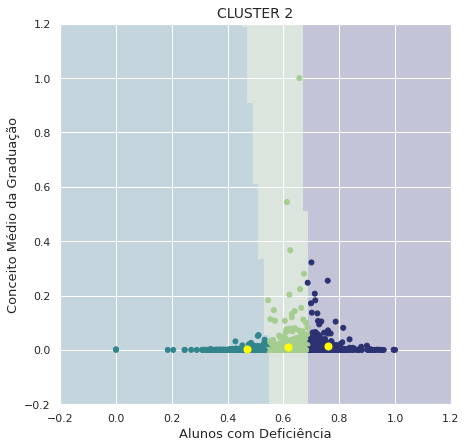

In [642]:
#Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (7,7))
plt.clf()
Z2 = Z.reshape(xx.shape)
cmap = sns.color_palette("crest", as_cmap=True)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = cmap, aspect = 'auto', origin='lower', alpha=0.2)
plt.scatter(x = 'conceito_medio_graduacao', y = 'alunos_deficiencia', data = df_ies , c = labels2 , s = 25, cmap='crest')
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 50 , c = 'yellow' , alpha = 1)
plt.xlim(-0.2,1.2), plt.ylim(-0.2,1.2)
plt.title("CLUSTER 2", fontsize=14)
plt.ylabel('Conceito Médio da Graduação', fontsize=13) , plt.xlabel('Alunos com Deficiência', fontsize=13)
plt.savefig('k-means2.png', transparent = True)
plt.show()

###3.2.3 Recursos Acessibilidade x Alunos com Deficiência

In [643]:
#Inicializando e Computando o KMeans com o valor de 3 clusters:
X3 = df_ies[['num_recursos_medio', 'alunos_deficiencia']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X3)

KMeans(n_clusters=3)

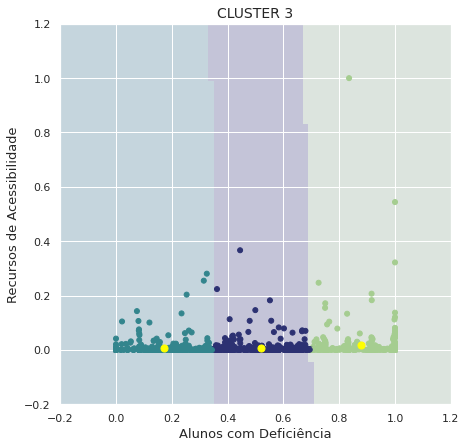

In [645]:
#Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (7,7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
cmap = sns.color_palette("crest", as_cmap=True)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = cmap, aspect = 'auto', origin='lower', alpha=0.2)
plt.scatter(x = 'num_recursos_medio', y = 'alunos_deficiencia', data = df_ies , c = labels2 , s = 25, cmap='crest')
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 50 , c = 'yellow' , alpha = 1)
plt.xlim(-0.2,1.2), plt.ylim(-0.2,1.2)
plt.title("CLUSTER 3", fontsize=14)
plt.ylabel('Recursos de Acessibilidade', fontsize=13) , plt.xlabel('Alunos com Deficiência', fontsize=13)
plt.savefig('k-means3.png', transparent = True)
plt.show()

###3.2.4 Recursos Acessibilidade x Receitas da IES

In [646]:
#Inicializando e Computando o KMeans com o valor de 3 clusters:
X4 = df_ies[['num_recursos_medio', 'receitas']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X4)

KMeans(n_clusters=3)

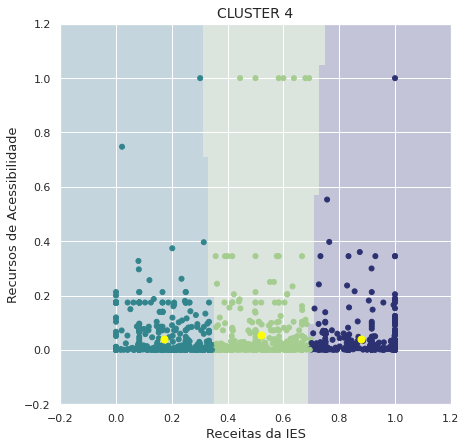

In [648]:
#Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (7,7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
cmap = sns.color_palette("crest", as_cmap=True)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = cmap, aspect = 'auto', origin='lower', alpha=0.2)
plt.scatter(x = 'num_recursos_medio', y = 'receitas', data = df_ies , c = labels2 , s = 25, cmap='crest')
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 50 , c = 'yellow' , alpha = 1)
plt.xlim(-0.2,1.2), plt.ylim(-0.2,1.2)
plt.title("CLUSTER 4", fontsize=14)
plt.ylabel('Recursos de Acessibilidade', fontsize=13) , plt.xlabel('Receitas da IES', fontsize=13)
plt.savefig('k-means4.png', transparent = True)
plt.show()

###3.2.5 Recursos Acessibilidade x Despesas com Investimentos da IES

In [670]:
X5 = df_ies[['num_recursos_medio', 'despesa_investimento']].iloc[: , :].values
algorithm = KMeans(n_clusters=3)
algorithm.fit(X5)

KMeans(n_clusters=3)

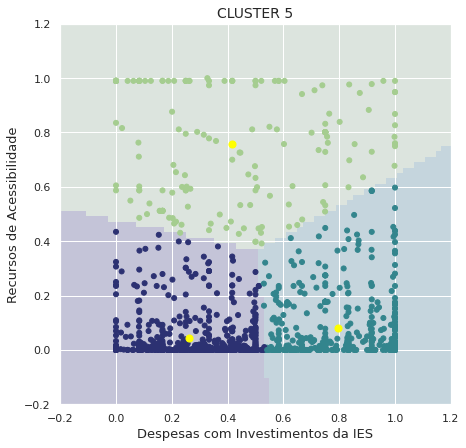

In [671]:
#Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (7,7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
cmap = sns.color_palette("crest", as_cmap=True)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = cmap, aspect = 'auto', origin='lower', alpha=0.2)
plt.scatter(x = 'num_recursos_medio', y = 'despesa_investimento', data = df_ies , c = labels2 , s = 25, cmap='crest')
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 50 , c = 'yellow' , alpha = 1)
plt.xlim(-0.2,1.2), plt.ylim(-0.2,1.2)
plt.title("CLUSTER 5", fontsize=14)
plt.ylabel('Recursos de Acessibilidade', fontsize=13) , plt.xlabel('Despesas com Investimentos da IES', fontsize=13)
plt.savefig('k-means5.png', transparent = True)
plt.show()